In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor


# Water Quality Index

In [300]:
file ='C:/Users/ASUS/OneDrive/Desktop/BENNETT UNIVERSITY/Semester 5/Competitive Programming/Project/CompProg/waterquality.csv'
df4 = pd.read_csv(file, encoding = 'cp1252')
df4

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...
529,2940,"GAPE- SAGAR LAKE, DUNGARPUR, RAJASTHAN",RAJASTHAN,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,2941,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 1...",RAJASTHAN,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,2942,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 2...",RAJASTHAN,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,2943,"LODHA TALAB, BANSWARA- DUNGARPUR ROAD, BANSWAR...",RAJASTHAN,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


In [301]:
df4['STATE'].isnull().sum()

0

In [302]:
first_column = df4.pop('STATE')
df4.insert(0, 'STATE', first_column)
df5 = df4.drop(['STATION CODE', 'FECAL_COLIFORM'], axis = 1)
df5

,STATE,LOCATIONS,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,TOTAL_COLIFORM
0,MAHARASHTRA,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",29.2,6.4,8.1,735.0,3.4,2.00,73.0
1,MAHARASHTRA,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,24.5,6.0,8.0,270.0,3.1,2.00,182.0
2,MAHARASHTRA,GODAVARI RIVER AT SAIKHEDA.,25.8,5.5,7.8,355.0,4.2,9.00,133.0
3,MAHARASHTRA,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",24.8,5.5,7.8,371.0,5.6,3.55,283.0
4,MAHARASHTRA,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,25.7,5.7,7.9,294.0,3.2,2.69,132.0
...,...,...,...,...,...,...,...,...,...
529,RAJASTHAN,"GAPE- SAGAR LAKE, DUNGARPUR, RAJASTHAN",23.2,4.4,8.1,538.0,1.2,1.00,14.0
530,RAJASTHAN,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 1...",22.9,5.6,8.4,591.0,1.1,3.00,8.0
531,RAJASTHAN,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 2...",22.9,5.8,8.5,588.0,1.2,3.00,6.0
532,RAJASTHAN,"LODHA TALAB, BANSWARA- DUNGARPUR ROAD, BANSWAR...",28.7,4.1,7.9,1133.0,2.3,2.00,67.0


In [303]:
df5.columns

Index(['STATE', 'LOCATIONS', 'TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD',
       'NITRATE_N_NITRITE_N', 'TOTAL_COLIFORM'],
      dtype='object')

In [304]:
max_v = df5['DO'].max()
min_v = max_v

for i in df5['DO']:
    if pd.notnull(i):
        min_v = min(max_v, i)

print("Max:", max_v, "Min:", min_v)


Max: 16.3 Min: 3.5


In [305]:
max_v = df5['pH'].max()
min_v = max_v

for i in df5['pH']:
    if pd.notnull(i):
        min_v = min(max_v, i)

print("Max:", max_v, "Min:", min_v)


Max: 14.7 Min: 8.9


In [306]:
max_v = df5['CONDUCTIVITY'].max()
min_v = max_v

for i in df5['CONDUCTIVITY']:
    if pd.notnull(i):
        min_v = min(max_v, i)

print("Max:", max_v, "Min:", min_v)


Max: 24062.0 Min: 2004.0


In [307]:
max_v = df5['BOD'].max()
min_v = max_v

for i in df5['BOD']:
    if pd.notnull(i):
        min_v = min(max_v, i)

print("Max:", max_v, "Min:", min_v)


Max: 75.6 Min: 6.5


In [308]:
max_v = df5['NITRATE_N_NITRITE_N'].max()
min_v = max_v

for i in df5['NITRATE_N_NITRITE_N']:
    if pd.notnull(i):
        min_v = min(max_v, i)

print("Max:", max_v, "Min:", min_v)


Max: 45.5 Min: 1.0


In [309]:
max_v = df5['TOTAL_COLIFORM'].max()
min_v = max_v

for i in df5['TOTAL_COLIFORM']:
    if pd.notnull(i):
        min_v = min(max_v, i)

print("Max:", max_v, "Min:", min_v)


Max: 23816667.0 Min: 248.0


In [310]:
df5['DO_SubIndex']=df5.DO.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [311]:
df5['pH_SubIndex']=df5.pH.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [312]:
df5['CONDUCTIVITY_SubIndex']=df5.CONDUCTIVITY.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [313]:
df5['BOD_SubIndex']=df5.BOD.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))


In [314]:
df5['NITRATE_N_NITRITE_N_SubIndex']=df5.NITRATE_N_NITRITE_N.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

In [315]:
df5['TOTAL_COLIFORM_SubIndex']=df5.TOTAL_COLIFORM.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [316]:
df5

,STATE,LOCATIONS,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,TOTAL_COLIFORM,DO_SubIndex,pH_SubIndex,CONDUCTIVITY_SubIndex,BOD_SubIndex,NITRATE_N_NITRITE_N_SubIndex,TOTAL_COLIFORM_SubIndex
0,MAHARASHTRA,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",29.2,6.4,8.1,735.0,3.4,2.00,73.0,100,100,0,80,100,60
1,MAHARASHTRA,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,24.5,6.0,8.0,270.0,3.1,2.00,182.0,100,100,40,80,100,60
2,MAHARASHTRA,GODAVARI RIVER AT SAIKHEDA.,25.8,5.5,7.8,355.0,4.2,9.00,133.0,80,100,0,80,100,60
3,MAHARASHTRA,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",24.8,5.5,7.8,371.0,5.6,3.55,283.0,80,100,0,80,100,60
4,MAHARASHTRA,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,25.7,5.7,7.9,294.0,3.2,2.69,132.0,80,100,40,80,100,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,RAJASTHAN,"GAPE- SAGAR LAKE, DUNGARPUR, RAJASTHAN",23.2,4.4,8.1,538.0,1.2,1.00,14.0,60,100,0,100,100,80
530,RAJASTHAN,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 1...",22.9,5.6,8.4,591.0,1.1,3.00,8.0,80,100,0,100,100,80
531,RAJASTHAN,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 2...",22.9,5.8,8.5,588.0,1.2,3.00,6.0,80,100,0,100,100,80
532,RAJASTHAN,"LODHA TALAB, BANSWARA- DUNGARPUR ROAD, BANSWAR...",28.7,4.1,7.9,1133.0,2.3,2.00,67.0,60,100,0,100,100,60


In [317]:
df5['WQI_calculated']= df5['pH_SubIndex'] * 0.165 + df5['DO_SubIndex']* 0.281 + df5['BOD_SubIndex'] * 0.234 + df5['CONDUCTIVITY_SubIndex']* 0.009 + df5['NITRATE_N_NITRITE_N_SubIndex'] * 0.028 + df5['TOTAL_COLIFORM_SubIndex']* 0.281
df5

,STATE,LOCATIONS,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,TOTAL_COLIFORM,DO_SubIndex,pH_SubIndex,CONDUCTIVITY_SubIndex,BOD_SubIndex,NITRATE_N_NITRITE_N_SubIndex,TOTAL_COLIFORM_SubIndex,WQI_calculated
0,MAHARASHTRA,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",29.2,6.4,8.1,735.0,3.4,2.00,73.0,100,100,0,80,100,60,82.98
1,MAHARASHTRA,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,24.5,6.0,8.0,270.0,3.1,2.00,182.0,100,100,40,80,100,60,83.34
2,MAHARASHTRA,GODAVARI RIVER AT SAIKHEDA.,25.8,5.5,7.8,355.0,4.2,9.00,133.0,80,100,0,80,100,60,77.36
3,MAHARASHTRA,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",24.8,5.5,7.8,371.0,5.6,3.55,283.0,80,100,0,80,100,60,77.36
4,MAHARASHTRA,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,25.7,5.7,7.9,294.0,3.2,2.69,132.0,80,100,40,80,100,60,77.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,RAJASTHAN,"GAPE- SAGAR LAKE, DUNGARPUR, RAJASTHAN",23.2,4.4,8.1,538.0,1.2,1.00,14.0,60,100,0,100,100,80,82.04
530,RAJASTHAN,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 1...",22.9,5.6,8.4,591.0,1.1,3.00,8.0,80,100,0,100,100,80,87.66
531,RAJASTHAN,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 2...",22.9,5.8,8.5,588.0,1.2,3.00,6.0,80,100,0,100,100,80,87.66
532,RAJASTHAN,"LODHA TALAB, BANSWARA- DUNGARPUR ROAD, BANSWAR...",28.7,4.1,7.9,1133.0,2.3,2.00,67.0,60,100,0,100,100,60,76.42


In [318]:
max_v = df5['WQI_calculated'].max()
min_v = max_v

for i in df5['WQI_calculated']:
    if pd.notnull(i):
        min_v = min(max_v, i)

print("Max:", max_v, "Min:", min_v)


Max: 98.9 Min: 51.540000000000006


In [319]:
def get_WQI_bucket(x):
    if x <= 50:
        return "Reduces crop yields, less harm to soil microorganisms"
    elif x <= 60:
        return "Reduces crop yields, more harm to soil microorganisms"
    elif x <= 70:
        return "Reduces soil fertility, damages soil microorganisms"
    elif x <= 80:
        return "Bioaccumulation in organisms, disrupting food chains"
    elif x <= 90:
        return "Toxic to aquatic organisms, disrupting food chains"
    elif x > 100:
        return "Severe"
    else:
        return np.NaN
    
df5["WQI_bucket"] = df5["WQI_calculated"].apply(lambda x: get_WQI_bucket(x))
df5

,STATE,LOCATIONS,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,TOTAL_COLIFORM,DO_SubIndex,pH_SubIndex,CONDUCTIVITY_SubIndex,BOD_SubIndex,NITRATE_N_NITRITE_N_SubIndex,TOTAL_COLIFORM_SubIndex,WQI_calculated,WQI_bucket
0,MAHARASHTRA,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",29.2,6.4,8.1,735.0,3.4,2.00,73.0,100,100,0,80,100,60,82.98,"Toxic to aquatic organisms, disrupting food ch..."
1,MAHARASHTRA,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,24.5,6.0,8.0,270.0,3.1,2.00,182.0,100,100,40,80,100,60,83.34,"Toxic to aquatic organisms, disrupting food ch..."
2,MAHARASHTRA,GODAVARI RIVER AT SAIKHEDA.,25.8,5.5,7.8,355.0,4.2,9.00,133.0,80,100,0,80,100,60,77.36,"Bioaccumulation in organisms, disrupting food ..."
3,MAHARASHTRA,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",24.8,5.5,7.8,371.0,5.6,3.55,283.0,80,100,0,80,100,60,77.36,"Bioaccumulation in organisms, disrupting food ..."
4,MAHARASHTRA,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,25.7,5.7,7.9,294.0,3.2,2.69,132.0,80,100,40,80,100,60,77.72,"Bioaccumulation in organisms, disrupting food ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,RAJASTHAN,"GAPE- SAGAR LAKE, DUNGARPUR, RAJASTHAN",23.2,4.4,8.1,538.0,1.2,1.00,14.0,60,100,0,100,100,80,82.04,"Toxic to aquatic organisms, disrupting food ch..."
530,RAJASTHAN,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 1...",22.9,5.6,8.4,591.0,1.1,3.00,8.0,80,100,0,100,100,80,87.66,"Toxic to aquatic organisms, disrupting food ch..."
531,RAJASTHAN,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 2...",22.9,5.8,8.5,588.0,1.2,3.00,6.0,80,100,0,100,100,80,87.66,"Toxic to aquatic organisms, disrupting food ch..."
532,RAJASTHAN,"LODHA TALAB, BANSWARA- DUNGARPUR ROAD, BANSWAR...",28.7,4.1,7.9,1133.0,2.3,2.00,67.0,60,100,0,100,100,60,76.42,"Bioaccumulation in organisms, disrupting food ..."


<Figure size 2160x720 with 0 Axes>

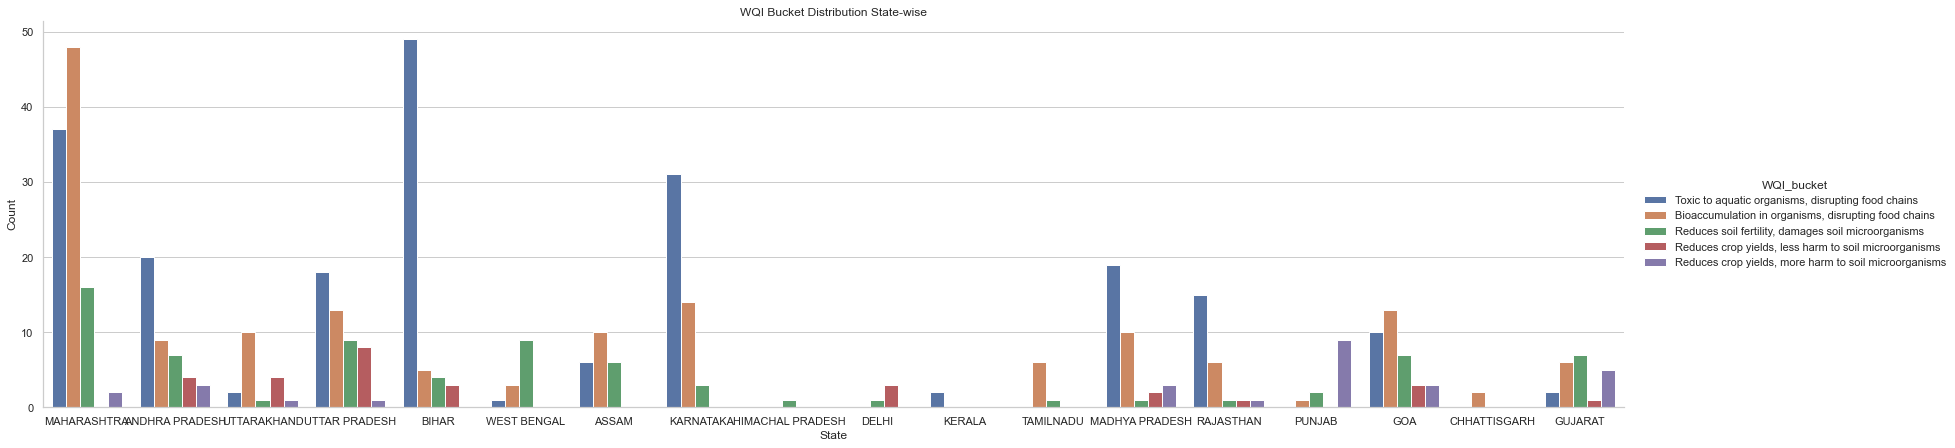

In [320]:
plt.figure(figsize=(30, 10))

sns.catplot(x='STATE', hue='WQI_bucket', data=df5, kind='count', height=6, aspect=3.8)
plt.title('WQI Bucket Distribution State-wise')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


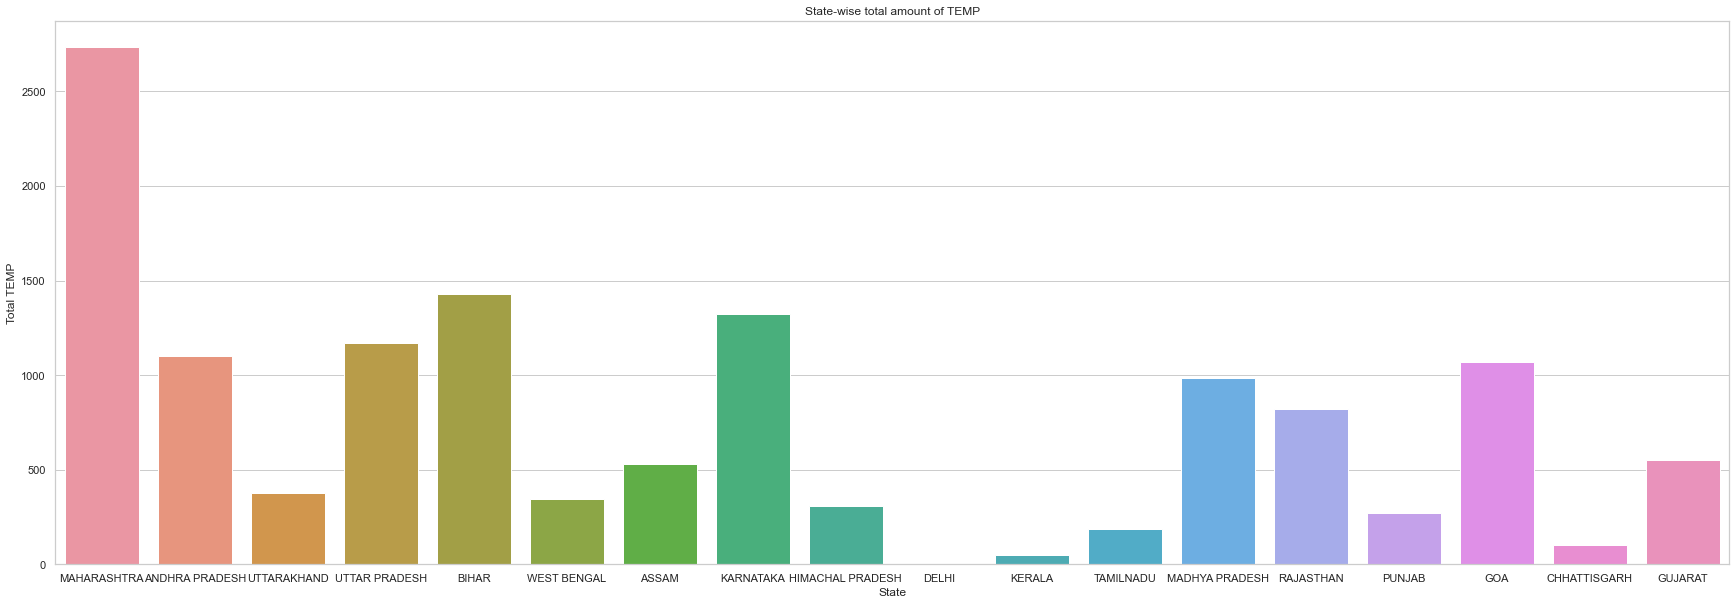

In [321]:
df5['LOCATIONS'] = df5['LOCATIONS'].apply(lambda x: x.split(',')[0])
sns.set(style="whitegrid")

plt.figure(figsize=(30, 10))
sns.barplot(x='STATE', y='TEMP', data=df5, estimator=sum, ci=None)
plt.title('State-wise total amount of TEMP')
plt.xlabel('State')
plt.ylabel('Total TEMP')
plt.show()

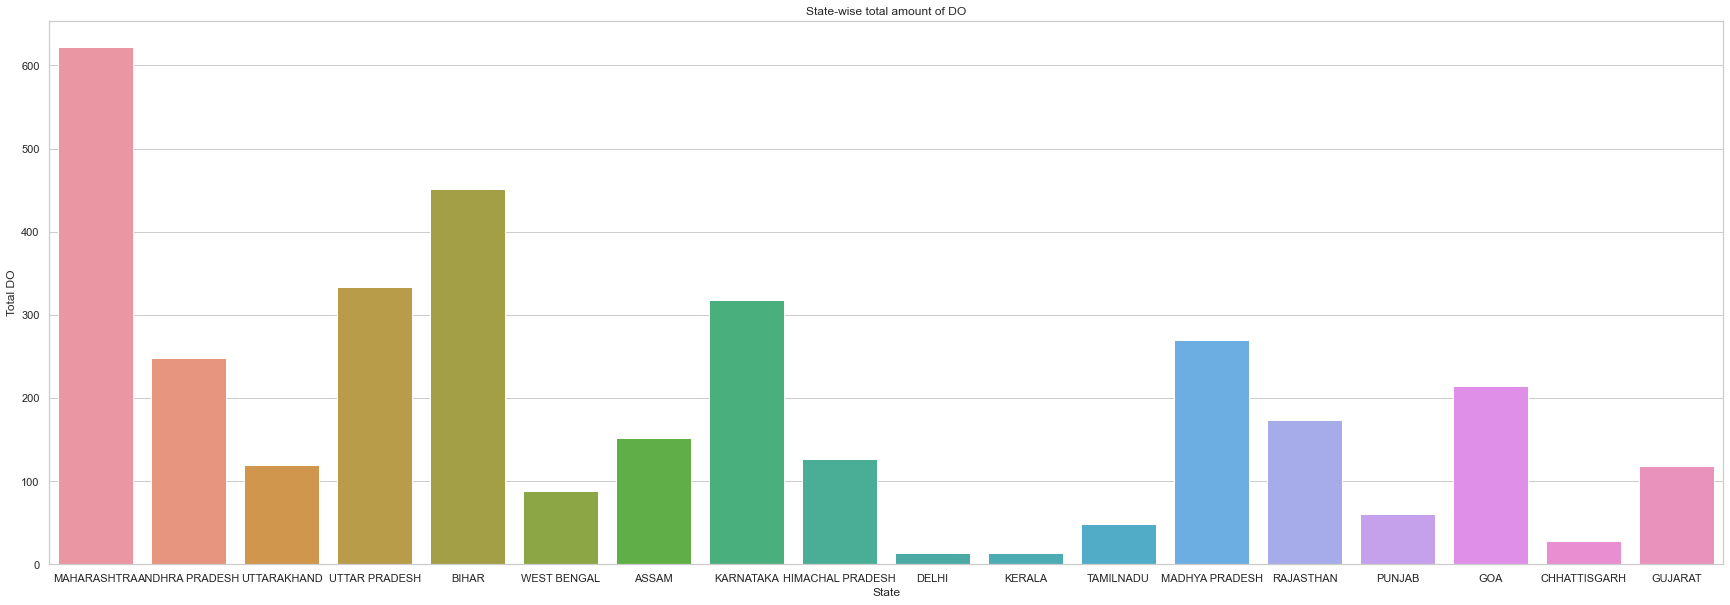

In [322]:
plt.figure(figsize=(30, 10))
sns.barplot(x='STATE', y='DO', data=df5, estimator=sum, ci=None)
plt.title('State-wise total amount of DO')
plt.xlabel('State')
plt.ylabel('Total DO')
plt.show()

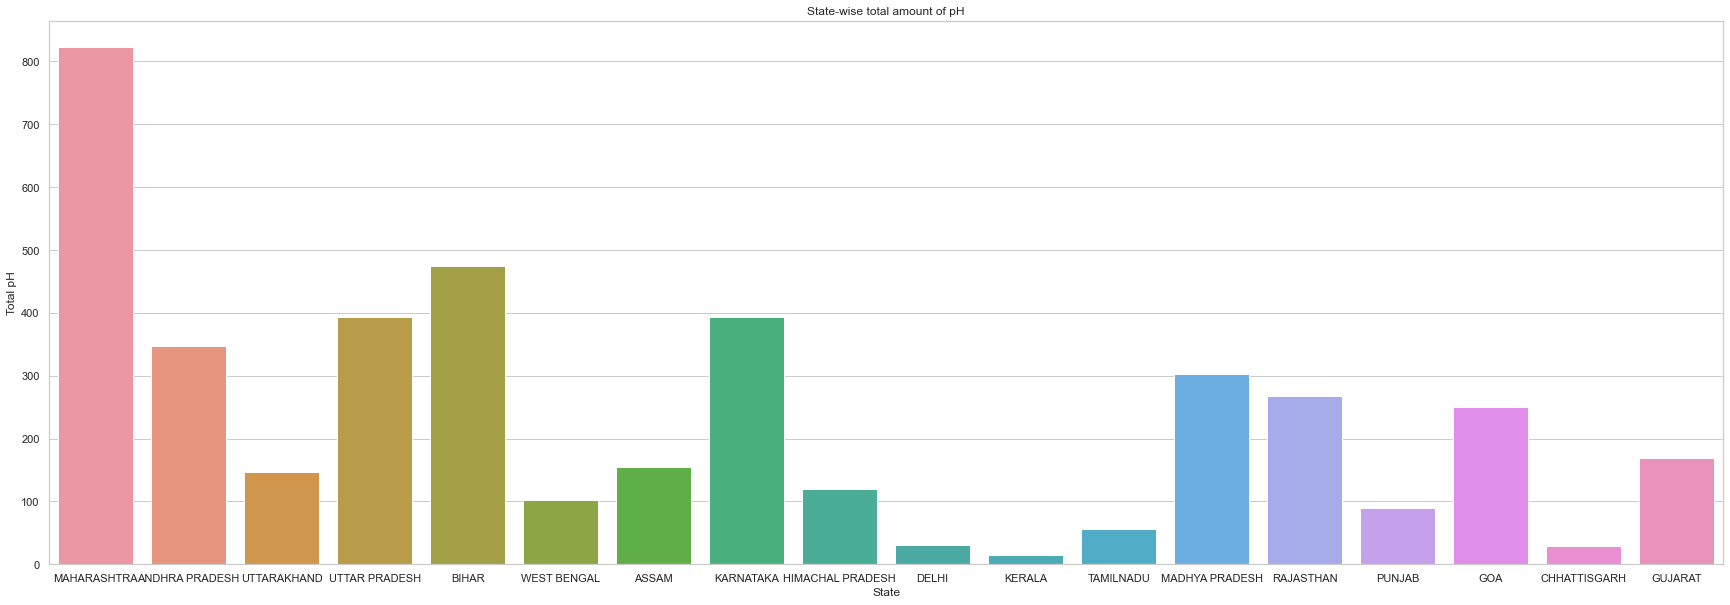

In [323]:
plt.figure(figsize=(30, 10))
sns.barplot(x='STATE', y='pH', data=df5, estimator=sum, ci=None)
plt.title('State-wise total amount of pH')
plt.xlabel('State')
plt.ylabel('Total pH')
plt.show()

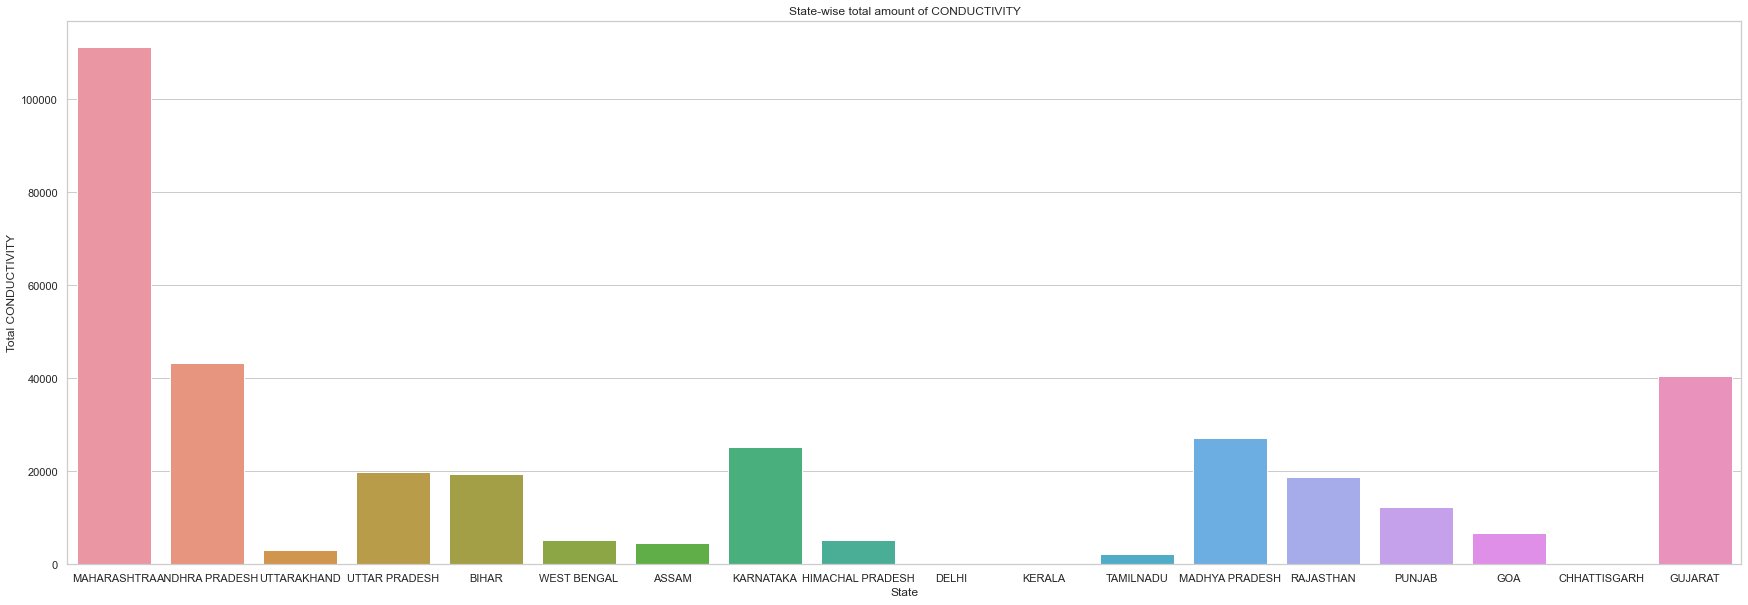

In [324]:
plt.figure(figsize=(30, 10))
sns.barplot(x='STATE', y='CONDUCTIVITY', data=df5, estimator=sum, ci=None)
plt.title('State-wise total amount of CONDUCTIVITY')
plt.xlabel('State')
plt.ylabel('Total CONDUCTIVITY')
plt.show()

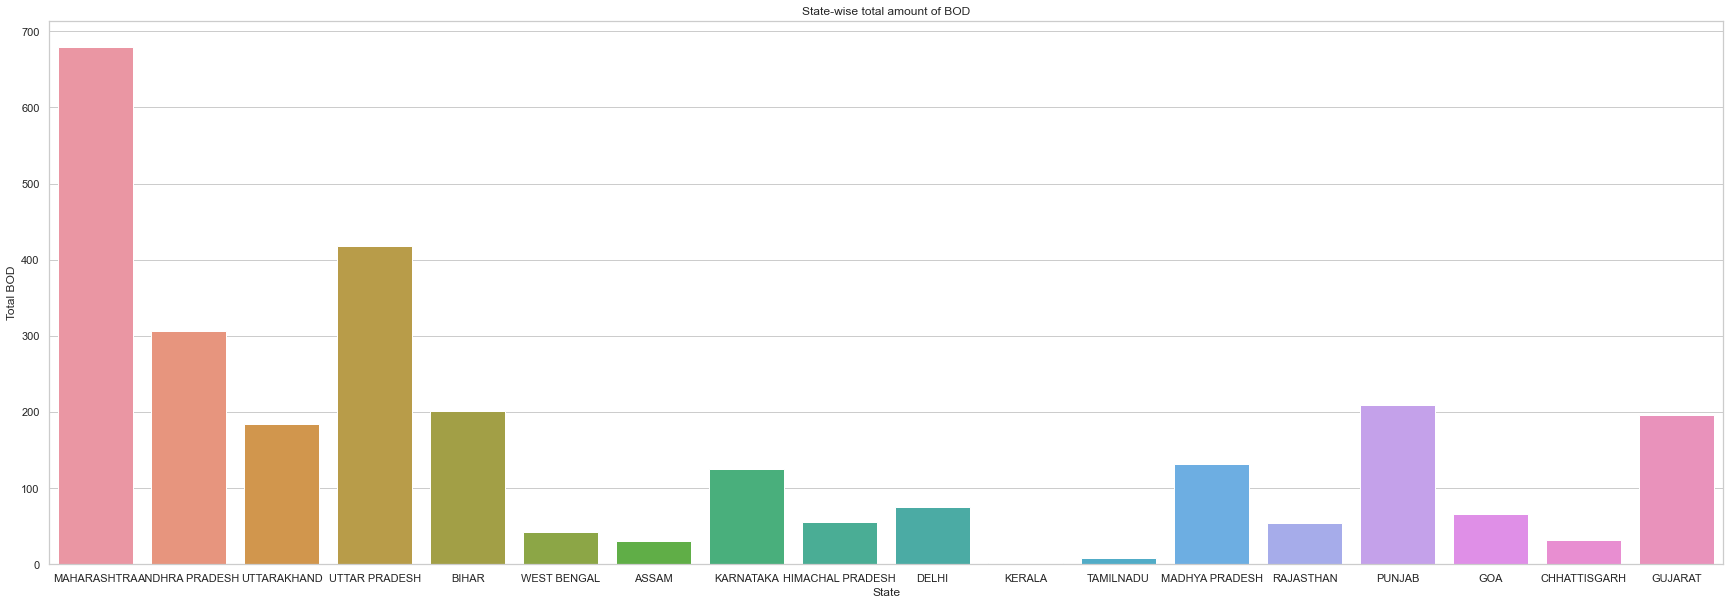

In [325]:
plt.figure(figsize=(30, 10))
sns.barplot(x='STATE', y='BOD', data=df5, estimator=sum, ci=None)
plt.title('State-wise total amount of BOD')
plt.xlabel('State')
plt.ylabel('Total BOD')
plt.show()

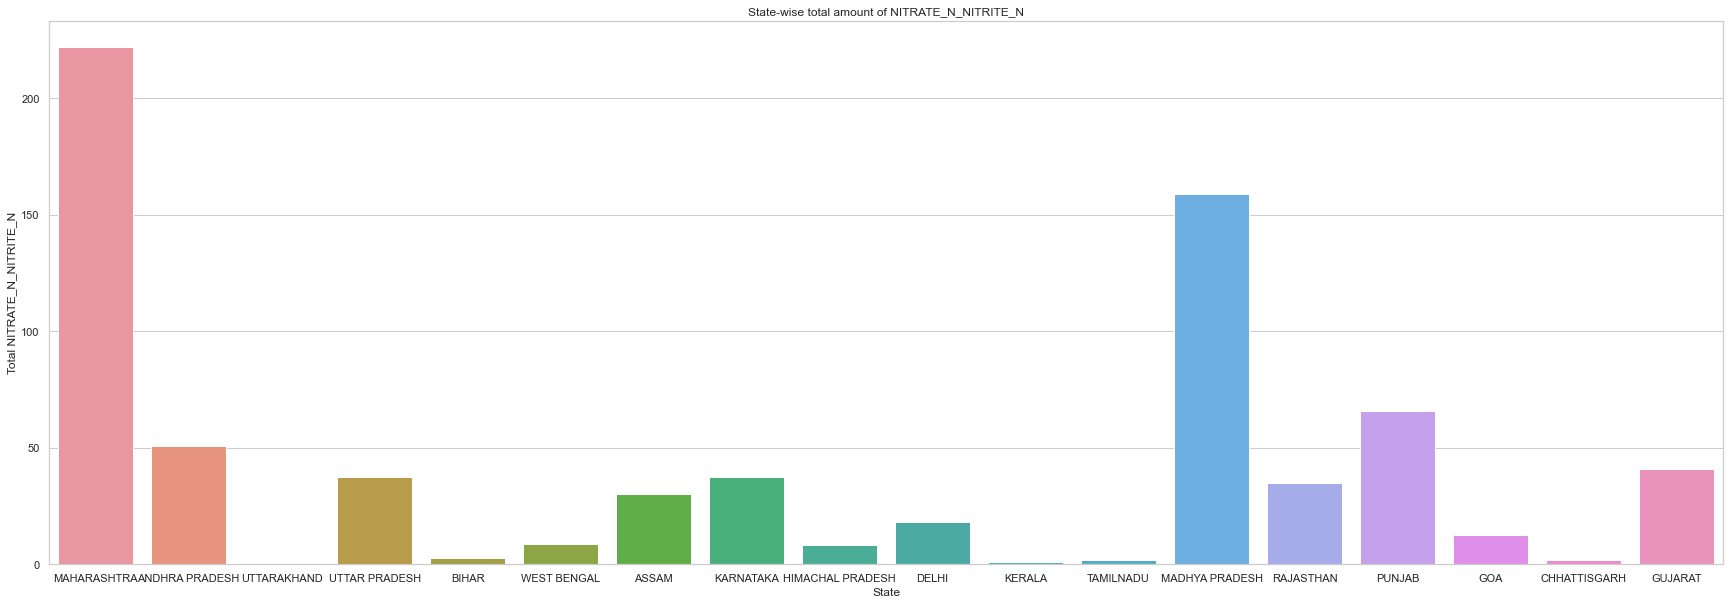

In [326]:
plt.figure(figsize=(30, 10))
sns.barplot(x='STATE', y='NITRATE_N_NITRITE_N', data=df5, estimator=sum, ci=None)
plt.title('State-wise total amount of NITRATE_N_NITRITE_N')
plt.xlabel('State')
plt.ylabel('Total NITRATE_N_NITRITE_N')
plt.show()

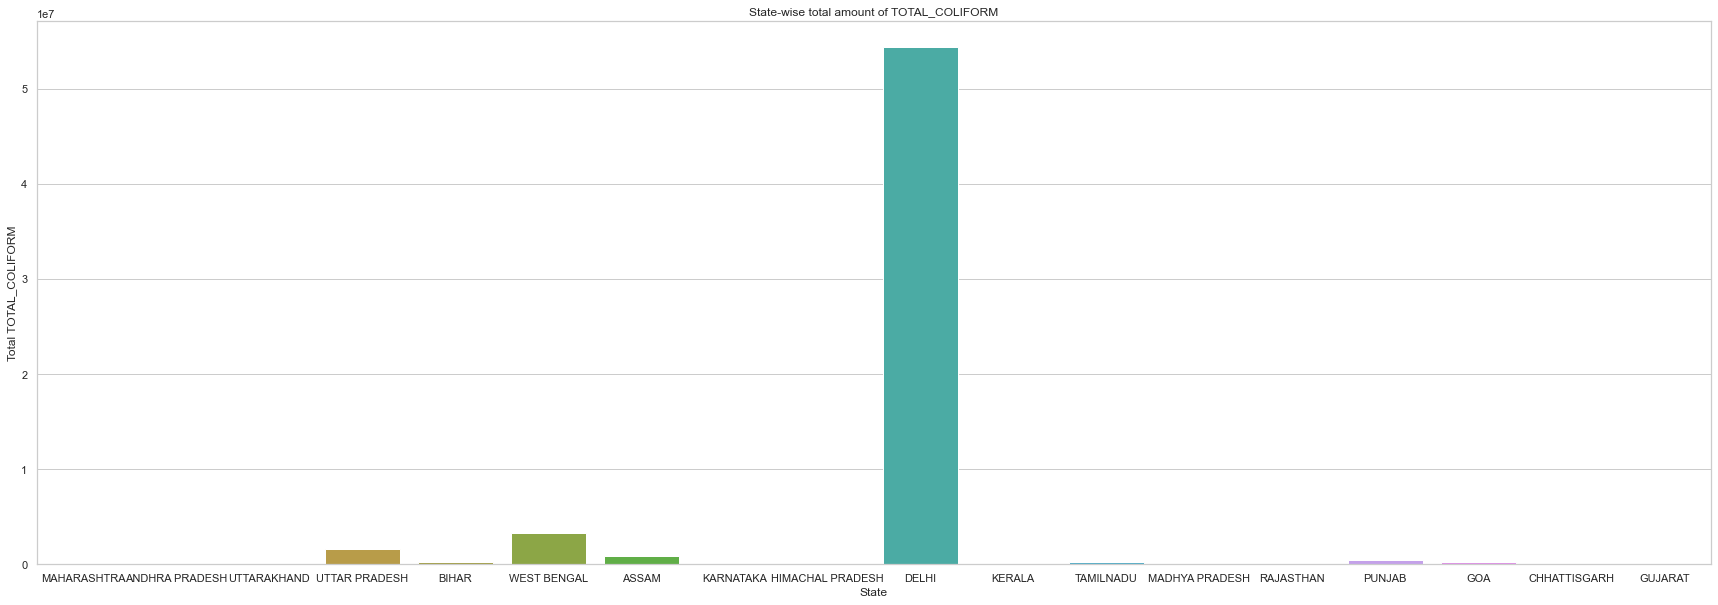

In [327]:
plt.figure(figsize=(30, 10))
sns.barplot(x='STATE', y='TOTAL_COLIFORM', data=df5, estimator=sum, ci=None)
plt.title('State-wise total amount of TOTAL_COLIFORM')
plt.xlabel('State')
plt.ylabel('Total TOTAL_COLIFORM')
plt.show()

In [328]:
X = df5[['DO_SubIndex', 'pH_SubIndex', 'CONDUCTIVITY_SubIndex', 'BOD_SubIndex', 'NITRATE_N_NITRITE_N_SubIndex', 'TOTAL_COLIFORM_SubIndex']]
y = df5['WQI_calculated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [329]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 64)                448       
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 8)                 136       
                                                                 
 dense_30 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [330]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [331]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [332]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.3, callbacks=[early_stopping])

Epoch 1/50
10/10 [==============================] - 1s 12ms/step - loss: 5889.4619 - accuracy: 0.0000e+00 - val_loss: 5665.2656 - val_accuracy: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 5878.2075 - accuracy: 0.0000e+00 - val_loss: 5655.6104 - val_accuracy: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 5867.8882 - accuracy: 0.0000e+00 - val_loss: 5642.0444 - val_accuracy: 0.0000e+00
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 5852.3960 - accuracy: 0.0000e+00 - val_loss: 5618.8564 - val_accuracy: 0.0000e+00
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 5824.8071 - accuracy: 0.0000e+00 - val_loss: 5576.9248 - val_accuracy: 0.0000e+00
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 5771.9438 - accuracy: 0.0000e+00 - val_loss: 5495.6392 - val_accuracy: 0.0000e+00
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 567

In [333]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'ANN Mean Squared Error: {mse}')

4/4 [==============================] - 0s 1ms/step
ANN Mean Squared Error: 23.888941469235863


In [334]:
# Decision Tree Regressor
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train_scaled, y_train)
y_pred_dt = model_dt.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Decision Tree Mean Squared Error: {mse_dt}')


Decision Tree Mean Squared Error: 2.8323214953271014


In [335]:
# Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')


Random Forest Mean Squared Error: 2.129468527476647


In [336]:
model_ridge = Ridge()
model_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression Mean Squared Error: {mse_ridge}')


Ridge Regression Mean Squared Error: 0.0006676485680664203


In [337]:
model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = model_lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression Mean Squared Error: {mse_lasso}')


Lasso Regression Mean Squared Error: 3.516413619932107


In [338]:
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train_scaled, y_train)
y_pred_gb = model_gb.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting Regressor Mean Squared Error: {mse_gb}')

Gradient Boosting Regressor Mean Squared Error: 0.5095816688680274


In [339]:
y_pred_dt = model_dt.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_ridge = model_ridge.predict(X_test_scaled)
y_pred_lasso = model_lasso.predict(X_test_scaled)
y_pred_gb = model_gb.predict(X_test_scaled)
y_pred_ann = model.predict(X_test_scaled).flatten()

predictions_df = pd.DataFrame({'Actual': y_test})
predictions_df['DecisionTree'] = y_pred_dt
predictions_df['RandomForest'] = y_pred_rf
predictions_df['RidgeRegression'] = y_pred_ridge
predictions_df['LassoRegression'] = y_pred_lasso
predictions_df['GradientBoosting'] = y_pred_gb
predictions_df['ANN'] = y_pred_ann


predictions_df


4/4 [==============================] - 0s 503us/step


,Actual,DecisionTree,RandomForest,RidgeRegression,LassoRegression,GradientBoosting,ANN
222,71.34,71.34,71.3346,71.356488,71.066997,71.337784,75.466721
131,70.80,70.80,70.8000,70.810983,71.066997,70.999567,77.245033
149,66.12,66.12,66.2180,66.133028,66.777313,65.144729,55.137184
244,77.36,77.36,77.3600,77.354879,77.352953,77.638212,73.429665
84,82.40,82.40,82.4000,82.391534,81.136028,82.288686,77.744148
...,...,...,...,...,...,...,...
321,83.34,83.34,83.3598,83.326989,82.387468,83.505604,73.440948
177,87.66,87.66,87.6600,87.636304,86.170544,87.625462,90.855225
220,68.22,68.22,67.5764,68.243225,69.090165,68.620786,67.360916
533,51.54,61.44,58.7882,51.572264,56.810436,55.790941,46.439484


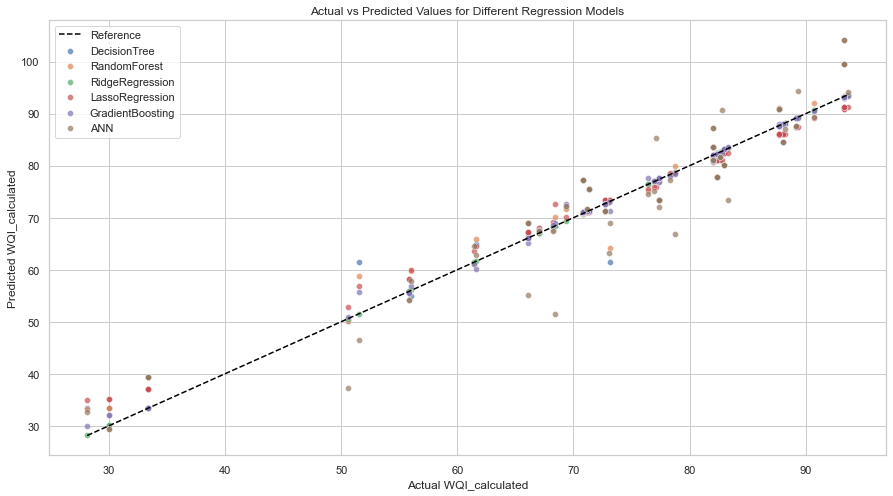

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot for each model
plt.figure(figsize=(15, 8))
models = ['DecisionTree', 'RandomForest', 'RidgeRegression', 'LassoRegression', 'GradientBoosting', 'ANN']

for model in models:
    sns.scatterplot(x='Actual', y=model, data=predictions_df, label=model, alpha=0.7)

# Add a diagonal line for reference
plt.plot([predictions_df['Actual'].min(), predictions_df['Actual'].max()],
         [predictions_df['Actual'].min(), predictions_df['Actual'].max()],
         linestyle='--', color='black', label='Reference')

plt.title('Actual vs Predicted Values for Different Regression Models')
plt.xlabel('Actual WQI_calculated')
plt.ylabel('Predicted WQI_calculated')
plt.legend()
plt.show()


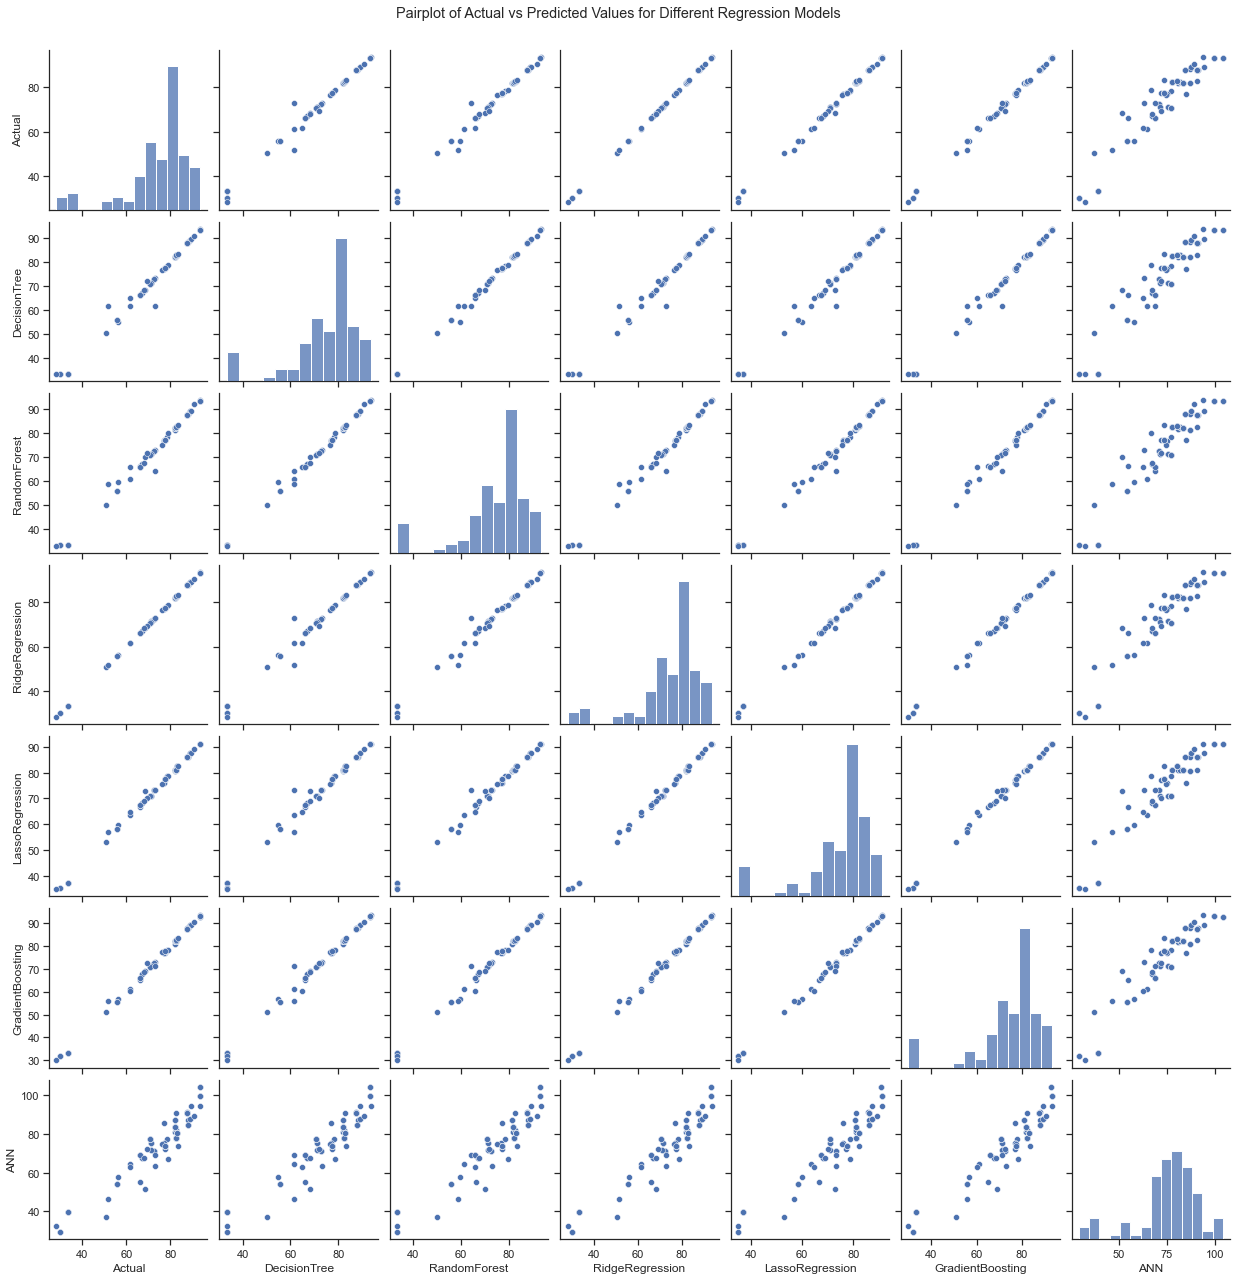

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt

pairplot_df = pd.concat([predictions_df['Actual'], predictions_df[models]], axis=1)

sns.set(style="ticks")

sns.pairplot(pairplot_df, height=2.5)
plt.suptitle('Pairplot of Actual vs Predicted Values for Different Regression Models', y=1.02)
plt.show()
